Mohammed Rayan - 23122123 \
Mayuri Ubale - 23122139

### Title: Fraud Detection Model Evaluation and Comparison


#### Objective:
The primary aim of this assignment is to develop a robust fraud detection model utilizing a dataset containing transactional information. The dataset comprises various features such as transaction category, transaction amount, gender, and geographical details. The goal is to predict whether a transaction is fraudulent or not based on the given features.

#### Dataset Description:

The dataset consists of 555,719 rows and 13 columns.
Initially, the dataset included information such as category, transaction amount, gender, city, state, zip code, latitude, longitude, city population, occupation, merchant latitude, merchant longitude, and a binary label indicating whether the transaction is fraudulent or not.
After preprocessing, columns such as 'city', 'state', 'zip', 'latitude', 'longitude', 'city_pop', and 'job' were dropped to streamline the dataset for model training.
Model Development and Evaluation:

Random Forest Model: Initially, a Random Forest model was employed, which yielded an impressive accuracy of 99.76%. However, a deeper analysis revealed that while precision for non-fraudulent transactions was perfect, there was room for improvement in detecting fraudulent ones.
Model Comparison: To explore alternative approaches, Gradient Boosting, Logistic Regression, and XGBoost models were also implemented. Surprisingly, Logistic Regression demonstrated competitive performance with an accuracy of 99.76%. Moreover, it showcased a significantly faster execution time compared to Random Forest and Gradient Boosting models.
Performance Metrics: Various performance metrics such as precision, recall, F1-score, and support were computed and summarized in a classification report for each model. Additionally, visual aids including confusion matrix, precision-recall curve, ROC curve, and feature importance plots were generated to facilitate a comprehensive understanding of model performance and behavior.
Conclusion:
Through rigorous evaluation and comparison, this assignment underscores the significance of exploring multiple models for fraud detection tasks. While Random Forest initially exhibited high accuracy, alternative models like Logistic Regression proved to be both efficient and effective. The assignment highlights the importance of not only accuracy but also computational efficiency in deploying fraud detection systems in real-world scenarios.

In [114]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import pydotplus
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

In [115]:
# Load your dfset
df = pd.read_csv("R:\MSc\Trimester-3\ML\Dataset\ccfraud1.csv")

In [116]:
df.shape

(555719, 13)

In [117]:
df.columns

Index(['category', 'amt', 'gender', 'city', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [118]:
df.category.unique()

array(['personal_care', 'health_fitness', 'misc_pos', 'travel',
       'kids_pets', 'shopping_pos', 'food_dining', 'home',
       'entertainment', 'shopping_net', 'misc_net', 'grocery_pos',
       'gas_transport', 'grocery_net'], dtype=object)

In [119]:
df.state.unique()

array(['SC', 'UT', 'NY', 'FL', 'MI', 'CA', 'SD', 'PA', 'TX', 'KY', 'WY',
       'AL', 'LA', 'GA', 'CO', 'OH', 'WI', 'VT', 'AR', 'NJ', 'IA', 'MD',
       'MS', 'KS', 'IL', 'MO', 'ME', 'TN', 'DC', 'AZ', 'MT', 'MN', 'OK',
       'WA', 'WV', 'NM', 'MA', 'NE', 'VA', 'ID', 'OR', 'IN', 'NC', 'NH',
       'ND', 'CT', 'NV', 'HI', 'RI', 'AK'], dtype=object)

In [120]:
d = {'home': 0, 'kids_pets': 1, 'personal_care': 2,'entertainment':3,'health_fitness':4,'food_dining': 5, 'shopping_pos': 6, 'travel': 7,'grocery_pos':8,'shopping_net':9,'misc_net':10,'misc_pos':11,'gas_transport':12,'grocery_net':13}
df['category'] = df['category'].map(d)


print(df)

        category     amt gender          city state    zip      lat      long  \
0              2    2.86      M      Columbia    SC  29209  33.9659  -80.9355   
1              2   29.84      F       Altonah    UT  84002  40.3207 -110.4360   
2              4   41.28      F      Bellmore    NY  11710  40.6729  -73.5365   
3             11   60.05      M    Titusville    FL  32780  28.5697  -80.8191   
4              7    3.19      M      Falmouth    MI  49632  44.2529  -85.0170   
...          ...     ...    ...           ...   ...    ...      ...       ...   
555714         4   43.77      M         Luray    MO  63453  40.4931  -91.8912   
555715         1  111.84      M  Lake Jackson    TX  77566  29.0393  -95.4401   
555716         1   86.88      F       Burbank    WA  99323  46.1966 -118.9017   
555717         7    7.99      M          Mesa    ID  83643  44.6255 -116.4493   
555718         3   38.13      M        Edmond    OK  73034  35.6665  -97.4798   

        city_pop           

In [121]:
n = {'M': 1,'F':0}
df['gender'] = df['gender'].map(n)
print(df)

        category     amt  gender          city state    zip      lat  \
0              2    2.86       1      Columbia    SC  29209  33.9659   
1              2   29.84       0       Altonah    UT  84002  40.3207   
2              4   41.28       0      Bellmore    NY  11710  40.6729   
3             11   60.05       1    Titusville    FL  32780  28.5697   
4              7    3.19       1      Falmouth    MI  49632  44.2529   
...          ...     ...     ...           ...   ...    ...      ...   
555714         4   43.77       1         Luray    MO  63453  40.4931   
555715         1  111.84       1  Lake Jackson    TX  77566  29.0393   
555716         1   86.88       0       Burbank    WA  99323  46.1966   
555717         7    7.99       1          Mesa    ID  83643  44.6255   
555718         3   38.13       1        Edmond    OK  73034  35.6665   

            long  city_pop                     job  merch_lat  merch_long  \
0       -80.9355    333497     Mechanical engineer  33.986

In [122]:
df.drop(['city', 'state','zip', 'lat','long', 'city_pop','job'], axis=1, inplace=True)

In [123]:
df.columns

Index(['category', 'amt', 'gender', 'merch_lat', 'merch_long', 'is_fraud'], dtype='object')

In [124]:
import numpy as np
X = np.array(df)
y = X[:,5]
X = X[:,0:4]

print(X)
print(y)

[[ 2.        2.86      1.       33.986391]
 [ 2.       29.84      0.       39.450498]
 [ 4.       41.28      0.       40.49581 ]
 ...
 [ 1.       86.88      0.       46.65834 ]
 [ 7.        7.99      1.       44.470525]
 [ 3.       38.13      1.       36.210097]]
[0. 0. 0. ... 0. 0. 0.]


In [125]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (555719, 4)
Shape of y: (555719,)


In [126]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=119982)

In [127]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9976337004246743
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    110714
         1.0       0.77      0.56      0.65       430

    accuracy                           1.00    111144
   macro avg       0.88      0.78      0.82    111144
weighted avg       1.00      1.00      1.00    111144



In [128]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[110641     73]
 [   190    240]]


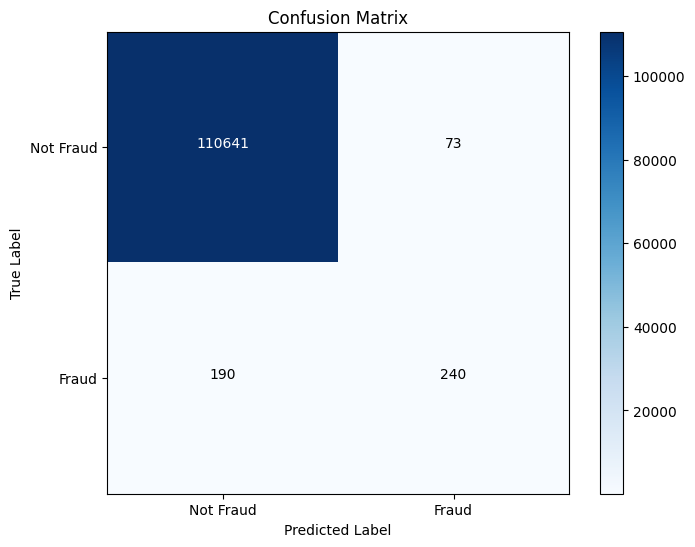

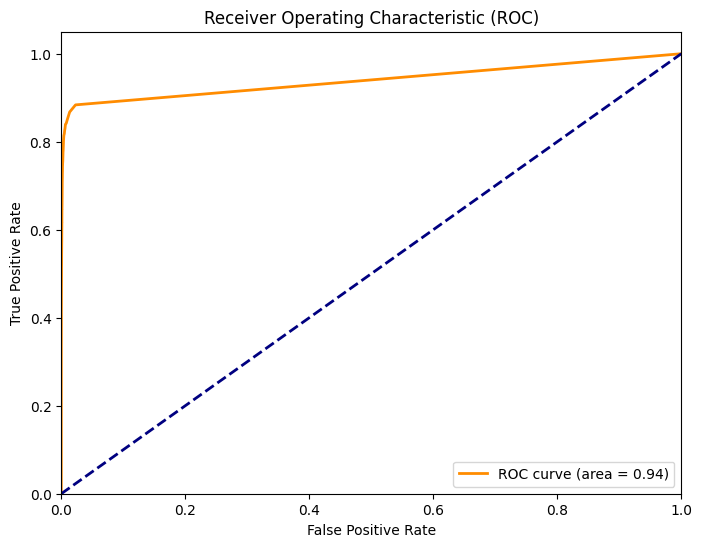

[[110641     73]
 [   190    240]]


In [129]:
from sklearn import metrics

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add value annotations
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.yticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

# Calculate ROC Curve
y_proba = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Print Confusion Matrix
print(conf_matrix)


In [130]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [131]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:")
print(accuracy)


Confusion Matrix:
[[110508    206]
 [   147    283]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    110714
         1.0       0.58      0.66      0.62       430

    accuracy                           1.00    111144
   macro avg       0.79      0.83      0.81    111144
weighted avg       1.00      1.00      1.00    111144


Accuracy:
0.9968239401137263


Accuracy: 0.9972738069531418
[[110653     61]
 [   242    188]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    110714
         1.0       0.76      0.44      0.55       430

    accuracy                           1.00    111144
   macro avg       0.88      0.72      0.78    111144
weighted avg       1.00      1.00      1.00    111144



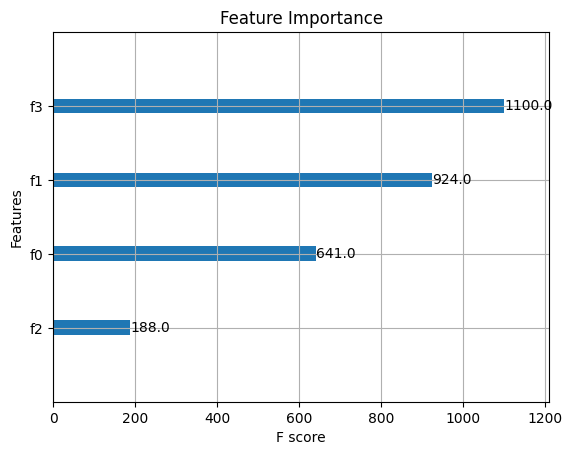

In [132]:
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import graphviz

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize and train the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot feature importance
xgb.plot_importance(model)
plt.title("Feature Importance")
plt.show()

# Plot a single tree
# xgb.plot_tree(model, num_trees=0)
# plt.show()

# Save the tree plot as a PDF
# dot_data = xgb.to_graphviz(model, num_trees=0)
# graph = graphviz.Source(dot_data)
# graph.render("xgboost_tree")


In [133]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:")
print(accuracy)

Confusion Matrix:
[[110679     35]
 [   430      0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    110714
         1.0       0.00      0.00      0.00       430

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144


Accuracy:
0.9958162383934356


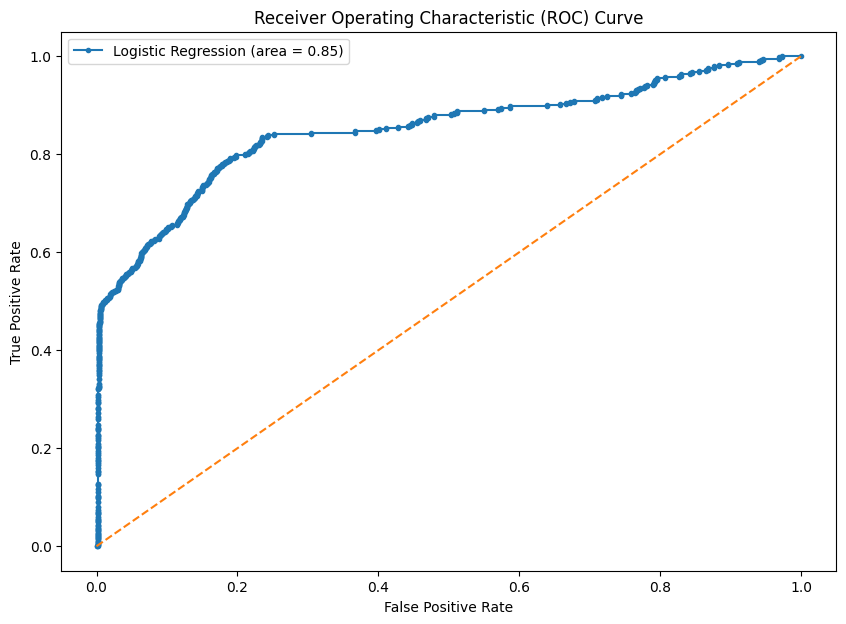

In [134]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, marker='.', label='Logistic Regression (area = %0.2f)' % roc_auc_score(y_test, y_probs))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


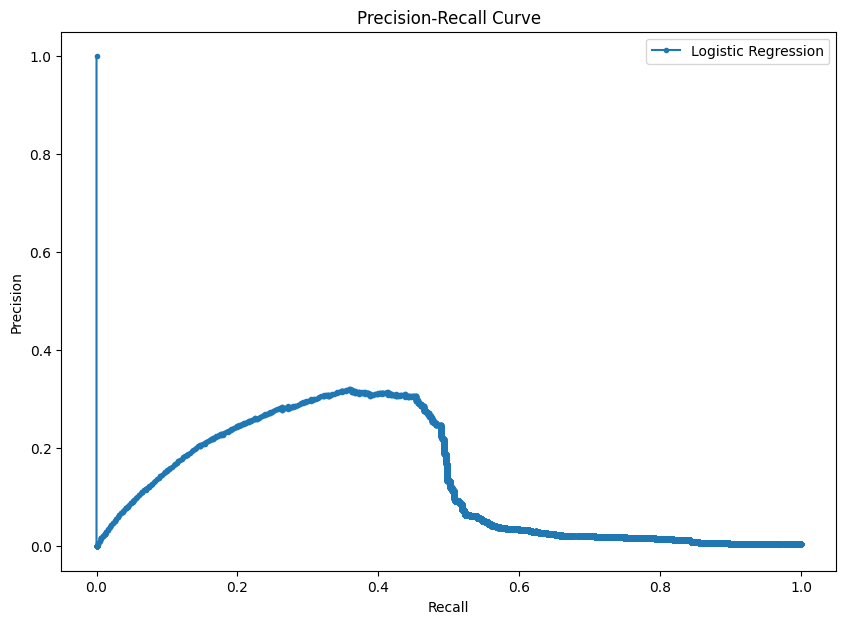

In [135]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot the precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
